<a href="https://colab.research.google.com/github/shohdy-source/Machine-Learing-Deep-Learning-/blob/main/Multivariate_Linear_Regression_Fish_Weight_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multivariate_Linear_Regression_Fish_Weight_Prediction**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import io


In [3]:
from google.colab import files


uploaded = files.upload()

Saving Fish.csv to Fish.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['Fish.csv']))
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'},inplace = True) # 'inplace= true' to make change in current dataframe
df.sample(5) # Display random 5 records

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
11,Bream,500.0,28.7,31.0,36.2,14.3714,4.8146
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
53,Roach,272.0,25.0,27.0,30.6,8.5680,4.7736
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
# isna() will return 'True' is value is 'None' or 'numpy.NaN'
# Characters such as empty strings '' or 'numpy.inf' are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True)
# you can also use df.isnull()
df.isna().sum() # Get sum of all Nan values from each column
#df.isna().values.any()

Species        0
Weight         0
VerticalLen    0
DiagonalLen    0
CrossLen       0
Height         0
Width          0
dtype: int64

In [8]:
df.Species.value_counts()


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [9]:
df_sp = df.Species.value_counts()
df_sp = pd.DataFrame(df_sp)
df_sp
# Or for better visualization we can use...
# df_sp.T # Just like matrices. 'dataframe.T' will Transpose index and columns

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


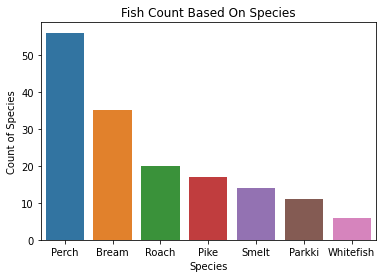

In [10]:
sns.barplot(x= df_sp.index, y = df_sp.Species) # df_sp.index will returns row labels of dataframe
plt.xlabel('Species')
plt.ylabel('Count of Species')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Fish Count Based On Species')
plt.show()

In [11]:
df[df.Weight <= 0]


,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [12]:
df1 = df.drop([40])
print('New dimension of dataset is= ', df1.shape)
df1.head(5)

New dimension of dataset is=  (158, 7)


,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [13]:
df1.corr()


,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
VerticalLen,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
DiagonalLen,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
CrossLen,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

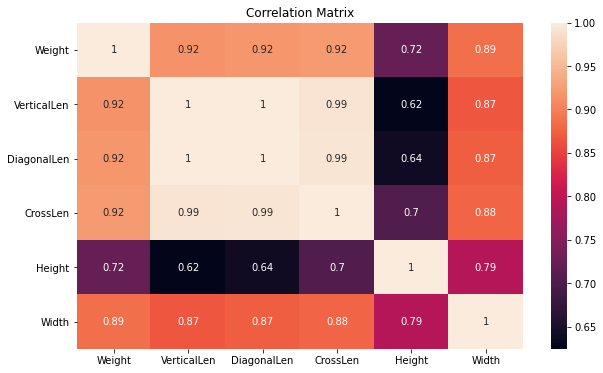

In [14]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
sns.heatmap(df1.corr(), annot =True)
plt.title('Correlation Matrix')

In [15]:
df2 = df1.drop(['VerticalLen', 'DiagonalLen', 'CrossLen'], axis =1) # Can also use axis = 'columns'
print('New dimension of dataset is= ', df2.shape)
df2.head()

New dimension of dataset is=  (158, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


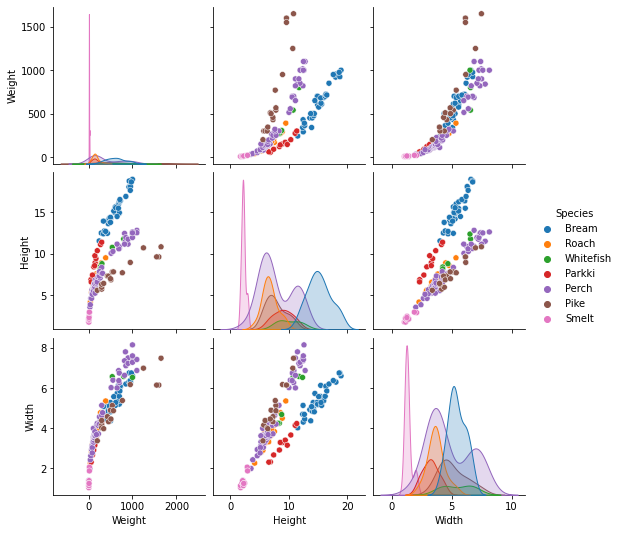

In [16]:
sns.pairplot(df2, kind = 'scatter', hue = 'Species')


Text(0.5, 1.0, 'Outlier Detection based on Weight')

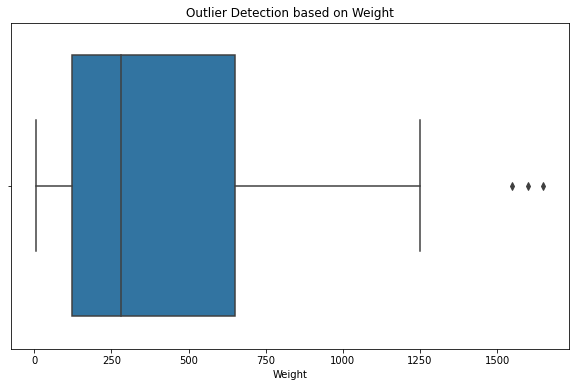

In [17]:
sns.boxplot(x=df2['Weight'])
plt.title('Outlier Detection based on Weight')

In [18]:
def outlier_detection(dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier

In [19]:
outlier_detection(df2['Weight'])


142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Outlier Detection based on Height')

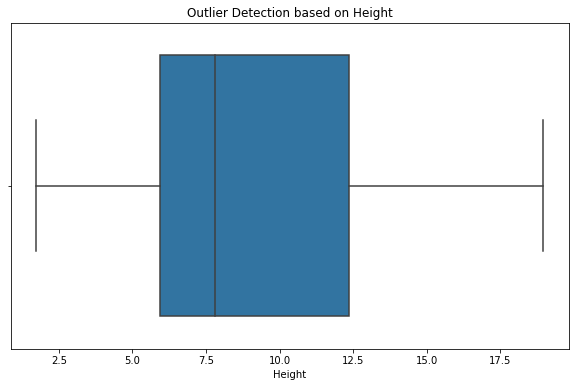

In [20]:
sns.boxplot(x =df2['Height'])
plt.title('Outlier Detection based on Height')

Text(0.5, 1.0, 'Outlier Detection based on Width')

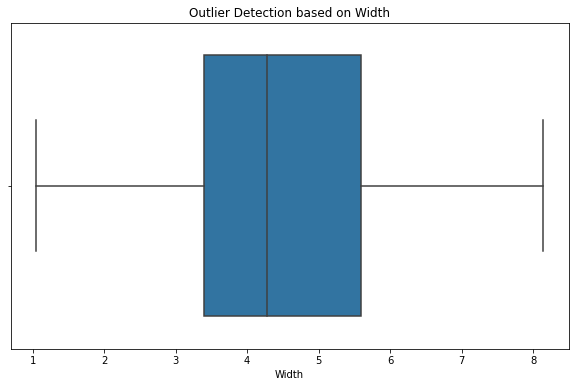

In [21]:
sns.boxplot(x = df2['Width'])
plt.title('Outlier Detection based on Width')

In [22]:
df3 = df2.drop([142,143,144])
df3.shape

(155, 4)

In [23]:
#X = df3.iloc[:,[2,3]] # Select columns using column index
X = df3[['Height','Width']] # Select columns using column name
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [24]:
#y = df3.iloc[:,[1]] # Select columns using column index
y = df3[['Weight']]
y.head(5)

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


In [26]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size =0.2) 
# Use paramter 'random_state=1' if you want keep results same everytime you execute above code
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (124, 2)
X_test dimension=  (31, 2)
y_train dimension=  (124, 1)
y_train dimension=  (31, 1)


In [27]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print('coef= ', model.coef_) # Since we have two features(Height and Width), there will be 2 coef
print('intercept= ', model.intercept_)
print('score= ', model.score(X_test,y_test))

coef=  [[ 12.42590192 143.75679963]]
intercept=  [-362.44243313]
score=  0.8402640032535185


In [29]:
predictedWeight = pd.DataFrame(model.predict(X_test), columns=['Predicted Weight']) # Create new dataframe of column'Predicted Weight'
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
Weight,820.000000,9.700000,475.000000,840.000000,430.0000,78.000000,160.000000,120.000000,500.000000,150.000000,150.000000,161.000000,145.000000,700.000000,920.000000,1100.000000,700.000000,120.000000,575.00000,500.00000,975.000000,500.000000,130.000000,100.000000,320.000000,1250.000000,110.000000,140.000000,260.000000,225.000000,600.000000
Predicted Weight,729.027566,-136.770769,548.549177,900.996181,530.2329,151.172304,263.359178,214.382372,508.266661,249.404243,223.664292,245.496097,233.368629,570.351656,768.255823,783.990799,738.421038,228.612526,626.19632,572.57091,839.089474,427.875135,220.222546,179.953183,418.138211,774.471352,219.347436,196.938583,349.802218,263.386235,631.551583


Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

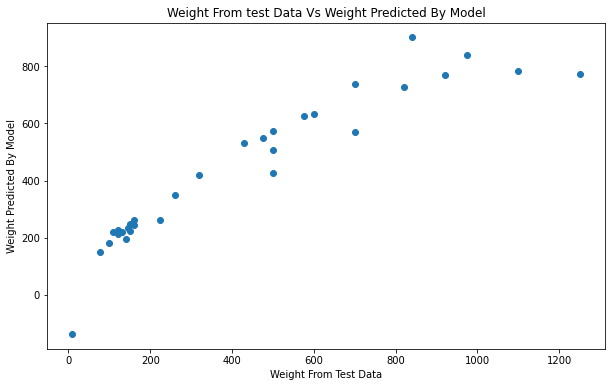

In [30]:
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Weight From test Data Vs Weight Predicted By Model")

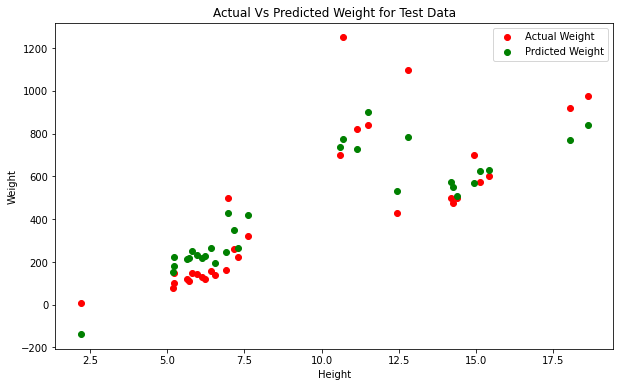

In [31]:
plt.scatter(X_test['Height'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Height'], model.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

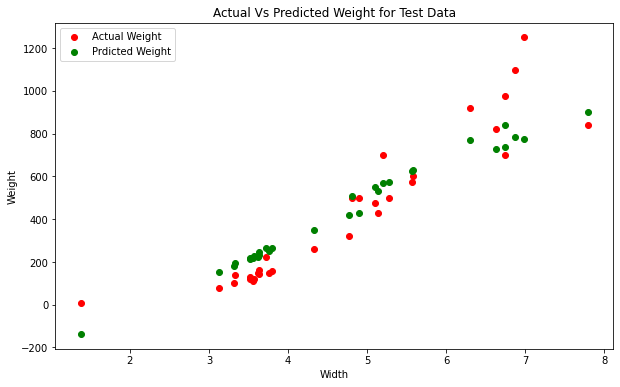

In [32]:
plt.scatter(X_test['Width'], y_test, color='red', label = 'Actual Weight')
plt.scatter(X_test['Width'], model.predict(X_test), color='green', label = 'Prdicted Weight')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight for Test Data')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

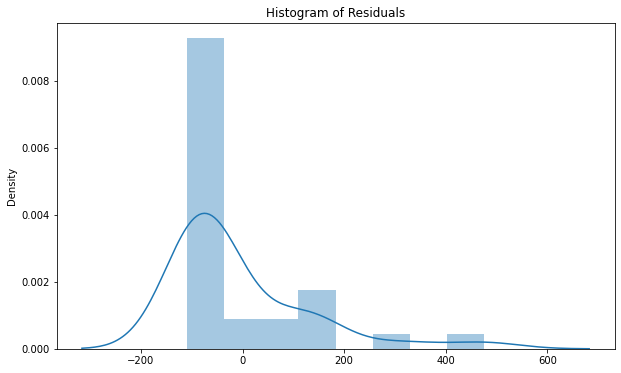

In [33]:
sns.distplot((y_test-model.predict(X_test)))
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Histogram of Residuals")